# xgcm for MPI-ESM ocean

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
xr.set_options(keep_attrs=True)
import xgcm
from xgcm import Grid
pa={'yincrease':False,'robust':True}

In [3]:
# make sure to install xgcm via pip to use metrics which was implemented after 0.2.0
xgcm.__version__

'0.3.0+14.ga4a9498'

In [29]:
timestr='317*'
runid='vga0214'
runid='asp_esmControl_PMassim_3014_SSTSSS_over_3170'
ds = xr.open_mfdataset(f'/work/bm1124/m300524/experiments/{runid}/outdata/mpiom/{runid}_mpiom_data_3d_mm_{timestr}.nc',
                       use_cftime=True, combine='nested', concat_dim='time')

ds

<xarray.Dataset>
Dimensions:         (depth: 40, depth_2: 41, time: 120, vertices: 4, x: 256, x_2: 256, x_3: 256, y: 220, y_2: 220, y_3: 220)
Coordinates:
    lon             (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat_3           (y_3, x_3) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat             (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lon_3           (y_3, x_3) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat_2           (y_2, x_2) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lon_2           (y_2, x_2) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * depth_2         (depth_2) float64 0.0 12.0 22.0 ... 5.42e+03 6.02e+03
  * depth           (depth) float64 6.0 17.0 27.0 ... 4.67e+03 5.17e+03 5.72e+03
  * time            (time) object 3170-01-31 23:15:00 ... 3179-12-31 23:15:00
Dimensions without coordinates: vertices, x, x_2, x_3, y, y_2, y_3
Data variables:
    lon_vertices    (time, y, x, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    lat_vertices    (time, y, x, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    lon_2_vertices  (time, y_2, x_2, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    lat_2_vertices  (time, y_2, x_2, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    lon_3_vertices  (time, y_3, x_3, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    lat_3_vertices  (time, y_3, x_3, vertices) float64 dask.array<chunksize=(12, 220, 256, 4), meta=np.ndarray>
    thetao          (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    uo              (time, depth, y_2, x_2) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    vo              (time, depth, y_3, x_3) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    so              (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    po              (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    wo              (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    rhopoto         (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    wmo             (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    wmosq           (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    umo             (time, depth, y_2, x_2) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    vmo             (time, depth, y_3, x_3) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    agessc          (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    heat_content    (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    avo             (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    difvho          (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    wtmix           (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    swrab           (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    rsdoabsorb      (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    thkcello        (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220, 256), meta=np.ndarray>
    rinu            (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    obvfsq          (time, depth_2, y, x) float32 dask.array<chunksize=(12, 41, 220, 256), meta=np.ndarray>
    nudging_so      (time, depth, y, x) float32 dask.array<chunksize=(12, 40, 220

In [30]:
fx = xr.open_dataset('/work/bm1124/m300524/experiments/asp_esmControl_PMassim_3014_T_over_3170/outdata/mpiom/asp_esmControl_PMassim_3014_T_over_3170_mpiom_fx_31700101_31701231.nc',
                     decode_times=False).load()

fx

<xarray.Dataset>
Dimensions:         (depth: 1, depth_2: 40, time: 1, vertices: 4, x: 256, x_2: 256, x_3: 256, x_4: 256, y: 220, y_2: 220, y_3: 220, y_4: 220)
Coordinates:
    lon             (y, x) float64 -47.37 -47.82 -48.26 ... 131.3 132.5 133.8
    lat             (y, x) float64 76.41 76.35 76.29 ... -77.25 -77.39 -77.54
    lon_2           (y_2, x_2) float64 -47.25 -47.69 -48.12 ... 132.5 133.8
    lat_2           (y_2, x_2) float64 76.36 76.3 76.24 ... -77.25 -77.39 -77.54
    lon_3           (y_3, x_3) float64 -47.48 -47.91 -48.34 ... 133.2 134.4
    lat_3           (y_3, x_3) float64 76.33 76.27 76.21 ... -77.47 -77.61
    lon_4           (y_4, x_4) float64 -47.36 -47.78 -48.2 ... 132.2 133.5 133.5
    lat_4           (y_4, x_4) float64 76.28 76.22 76.16 ... -77.33 -77.33
  * depth           (depth) float64 0.0
  * depth_2         (depth_2) float64 6.0 17.0 27.0 ... 5.17e+03 5.72e+03
  * time            (time) float64 0.0
Dimensions without coordinates: vertices, x, x_2, x_3, x_4, y, y_2, y_3, y_4
Data variables:
    lon_vertices    (y, x, vertices) float64 -46.58 -46.8 -47.26 ... 133.2 134.4
    lat_vertices    (y, x, vertices) float64 76.44 76.54 76.49 ... -77.47 -77.61
    lon_2_vertices  (y_2, x_2, vertices) float64 -46.47 -46.69 ... 133.2 133.5
    lat_2_vertices  (y_2, x_2, vertices) float64 76.38 76.49 ... -77.47 -77.33
    lon_3_vertices  (y_3, x_3, vertices) float64 -46.69 -46.69 ... 135.0 135.4
    lat_3_vertices  (y_3, x_3, vertices) float64 76.36 76.36 ... -77.68 -77.55
    lon_4_vertices  (y_4, x_4, vertices) float64 -47.25 -47.49 ... 132.5 132.5
    lat_4_vertices  (y_4, x_4, vertices) float64 76.36 76.46 ... -77.39 -77.39
    alatv           (time, depth, y, x) float32 nan nan nan nan ... nan nan nan
    alonv           (time, depth, y, x) float32 nan nan nan nan ... nan nan nan
    deptho          (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    dlxp            (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    dlyp            (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    areacello       (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    alatu           (time, depth, y_3, x_3) float32 76.32726 ... -77.61181
    alonu           (time, depth, y_3, x_3) float32 -47.475876 ... 134.39508
    weto            (time, depth_2, y_2, x_2) float32 nan nan nan ... nan nan
    dlxpsi          (time, depth, y_4, x_4) float32 nan nan nan ... nan nan nan
    dlypsi          (time, depth, y_4, x_4) float32 nan nan nan ... nan nan nan
    dduo            (time, depth_2, y_3, x_3) float32 0.0 0.0 0.0 ... 0.0 0.0
    dlxu            (time, depth, y_3, x_3) float32 13206.138 ... 34740.098
    dlyu            (time, depth, y_3, x_3) float32 13121.982 ... 34953.965
    ddue            (time, depth_2, y, x) float32 nan nan nan ... nan nan nan
    dlxv            (time, depth, y, x) float32 nan nan nan nan ... nan nan nan
    dlyv            (time, depth, y, x) float32 nan nan nan nan ... nan nan nan
    alat            (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    alon            (time, depth, y_2, x_2) float32 nan nan nan ... nan nan nan
    ddpo            (time, depth_2, y_2, x_2) float32 nan nan nan ... nan nan
    deuto           (time, depth, y_3, x_3) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    amsue           (time, depth_2, y, x) float32 nan nan nan ... nan nan nan
    amsuo           (time, depth_2, y_3, x_3) float32 0.0 0.0 0.0 ... 0.0 0.0
    deute           (time, depth, y, x) float32 nan nan nan nan ... nan nan nan
    thkcello        (time, depth_2, y_2, x_2) float32 nan nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 1.7.0rc3 (http://mpimet.mpg....
    Conventions:  CF-1.4
    MPIOM:        $Revision: mpiom/tags/mpiom-1.6.3p2 4873 $

# matching mitgcm expressions in MPIOM ds and fx
https://xgcm.readthedocs.io/en/latest/example_mitgcm.html


col | mitgcm |                                              | meaning | MPIOM   |
------|--------|----------------------------------------------|---------|---------|
     |dyC     | (YG, XC) float32 ...                         | Grid y distance at v vector point | dlyv  |
      |hFacC   | (Z, YC, XC) float32 ...                      | cell_vertical_fraction | irrelevant for MPIOM |
     |rA      | (YC, XC) float32 ...                         | cell area | areacello  | 
     |hFacS   | (Z, YG, XC) float32 ...                      | cell_vertical_fraction | irrelevant for MPIOM |
     |Depth   | (YC, XC) float32 ...                         | ocean depth | deute |
     |YG      | (YG) float32 -80.0 -76.0 ... 72.0 76.0       | latitude | y_g |
     |Z       | (Z) float32 -25.0 -85.0 ... -4190.0 -4855.0  |depth at center of cell|depth|
     |dyG     | (YC, XG) float32 ...                         | cell_y_size_at_u_location | dlyu |
     |rAw     | (YC, XG) float32 ...                         | cell_area_at_u_location | auxy |
     |drF     | (Z) float32 ...                              | cell_z_size | dd** |
     |YC      | (YC) float32 -78.0 -74.0 ... 74.0 78.0       | latitude | y |
     |dxG     | (YG, XC) float32 ...                         | cell_x_size_at_v_location | dlxv |
     |XG      | (XG) float32 0.0 4.0 ... 352.0 356.0         | longitude | x_g |
     |maskW   | (Z, YC, XG) bool ...                         | 3D land-sea mask | amsue/o |
     |Zl      | (Zl) float32 0.0 -50.0 ... -3870.0 -4510.0   |depth at top of cell|depth_2|
     |rAs     | (YG, XC) float32 ...                         | cell_area_at_v_location | avxy |
     |rAz     | (YG, XG) float32 ...                         | cell_area_at_f_location |  |
      |maskS   | (Z, YG, XC) bool ...                         |3D land-sea mask| weto |
     |dxC     | (YC, XG) float32 ...                         | cell_x_size_at_u_location | dlxu |
     |hFacW   |(Z, YC, XG) float32 ...                       | vertical fraction of open cell | irrelevant for MPIOM |
     |XC      | (XC) float32 2.0 6.0 ... 354.0 358.0         | longitude | x |

grid distance

| |dlx| dly  |   |   |
|---|---|---|---|---|
| u | _3| _3|   |   |
| v |   |   |   |   |
| p | _2| _2|   |   | 
|psi| _4| _4|   |   | 


Ocean thinkness at level

| var  | description | coords
|------|---|---|
| ddue | Ocean level thickness at v vector point | y,x,depth_2|
| dduo | Ocean level thickness at u vector point | y_3,x_3,depth_2|
| ddpo | Ocean level thickness at pressure point | y_2,x_2,depth_2|

| varname  | description  | dims  | units  |
|---|---|---|---|
| thkcello  | Cell thinkness  | y_2,x_2,depth_2  | m |
| areacello | Cell area  |  y_2,x_2 | m2

In [7]:
v='dlxv'
fx[v].squeeze().coords,fx[v].attrs

(Coordinates:
     lon      (y, x) float64 -47.37 -47.82 -48.26 -48.68 ... 131.3 132.5 133.8
     lat      (y, x) float64 76.41 76.35 76.29 76.22 ... -77.25 -77.39 -77.54
     depth    float64 0.0
     time     float64 0.0,
 {'standard_name': 'grid_x_distance_at_v_vector_point',
  'long_name': 'Grid x distance at v vector point',
  'units': 'm',
  'code': 188})

# MPIOM grid setup
Rabernat mentioned the different grid conventions in `MPIOM` compared to what `xgcm` expects like in `mitgcm`. A workaround is renaming of dimensions as described in https://github.com/xgcm/xgcm/issues/166.

In [7]:
rename_fx={
    'y_2':'y', 'x_2': 'x_g',
    'y_3':'y_g', 'x_3':'x',
    'y_4':'y_g', 'x_4':'x_g'
       }
fxr=fx.rename(rename_fx).squeeze() # squeeze of empty or 1-dims which cdo requires for time
# delete depth
del fxr['depth'] 
fxr=fxr.rename({'depth_2':'depth'})

In [8]:
rename_ds={
    'y_2':'y', 'x_2': 'x_g',
    'y_3':'y_g', 'x_3':'x',
    #'y_4':'y_g', 'x_4':'x_g' # ds doesnt have x_4,y_4
       }
dsr=ds.rename(rename_ds).squeeze()

In [9]:
# get second depth variable to fxr from dsr
fxr['depth_2'] = dsr['depth_2'].isel(depth_2=slice(None,-1))

In [10]:
fxr.depth_2 #Zl

<xarray.DataArray 'depth_2' (depth_2: 40)>
array([   0.,   12.,   22.,   32.,   42.,   52.,   62.,   75.,   90.,  110.,
        135.,  165.,  200.,  240.,  285.,  335.,  390.,  450.,  520.,  600.,
        690.,  790.,  900., 1020., 1150., 1290., 1440., 1610., 1790., 1980.,
       2180., 2400., 2650., 2920., 3220., 3570., 3970., 4420., 4920., 5420.])
Coordinates:
    time     float64 0.0
  * depth_2  (depth_2) float64 0.0 12.0 22.0 32.0 ... 4.42e+03 4.92e+03 5.42e+03
Attributes:
    standard_name:  depth
    long_name:      depth_below_sea
    units:          m
    positive:       down
    axis:           Z

In [11]:
fxr.depth

<xarray.DataArray 'depth' (depth: 40)>
array([   6. ,   17. ,   27. ,   37. ,   47. ,   57. ,   68.5,   82.5,  100. ,
        122.5,  150. ,  182.5,  220. ,  262.5,  310. ,  362.5,  420. ,  485. ,
        560. ,  645. ,  740. ,  845. ,  960. , 1085. , 1220. , 1365. , 1525. ,
       1700. , 1885. , 2080. , 2290. , 2525. , 2785. , 3070. , 3395. , 3770. ,
       4195. , 4670. , 5170. , 5720. ])
Coordinates:
  * depth    (depth) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
    time     float64 0.0
Attributes:
    standard_name:  depth
    long_name:      depth_below_sea
    units:          m
    positive:       up
    axis:           Z

In [12]:
# like in mitgcm
assert fxr.depth_2.size == fxr.depth.size

### set up new fxr variables

In [13]:
# 3D volumne
fxr['volcello'] = (fxr['areacello']*fxr['thkcello']).squeeze()
fxr['volcello'].attrs['standard_name'] = 'cell_volume'
fxr['volcello'].attrs['long_name'] = 'Cell volume'
fxr['volcello'].attrs['units'] = 'm^3'

In [14]:
# XY Area at different grids all at same depth
for p in ['v','u','p','psi']:
    new = f'a{p}xy'
    fxr[new] = fxr[f'dlx{p}']*fxr[f'dly{p}']
    fxr[new].attrs['standard_name'] = f'area_xy_at_{p}_point'
    fxr[new].attrs['long_name'] = f'Area xy at {p} point'
    fxr[new].attrs['units'] = 'm^2'
    fxr[new].attrs['calculation'] = f'dlx{p} * dly{p}'
    print(new,fxr[new].dims)
    #fxr[new].plot(**pa)
    #plt.show()

avxy ('y', 'x')
auxy ('y_g', 'x')
apxy ('y', 'x_g')
apsixy ('y_g', 'x_g')


In [15]:
fxr.dduo.dims,fxr.ddpo.dims,fxr.ddue.dims
# miss depth, 'y_g', ' x_g' Ocean level thickness at psi point

(('depth', 'y_g', 'x'), ('depth', 'y', 'x_g'), ('depth', 'y', 'x'))

In [16]:
# XZ and YZ Areas at different depths
for p in ['u','v','p','psi']: # at point {p,psi,u,v}
    for z in ['ddpo','dduo','ddue']: # find suitable cell thickness: missing psi
        for x in ['x','y']: # {x,y} direction
            try:
                new = f'a{p}{x}z'
                new_var = (fxr[f'dl{x}{p}']*fxr[z]).squeeze()
                if len(new_var.dims) == 3:
                    fxr[new] = (fxr[f'dl{x}{p}']*fxr[z]).squeeze()
                    fxr[new].attrs['standard_name'] = f'area_{x}z_at_{p}_point'
                    fxr[new].attrs['long_name'] = f'Area xy at {p} point'
                    fxr[new].attrs['units'] = 'm^2'
                    fxr[new].attrs['calculation'] = f'dlx{p} * dly{p}'
                    print(new,fxr[new].dims,fxr[new].attrs['long_name'])
                    #fxr[new].plot(**pa)
                    #plt.show()
            except:
                new = f'a{p}{x}z'
                print(f'{new} didnt work out: from {p},{z}')

auxz didnt work out: from u,ddpo
auyz didnt work out: from u,ddpo
auxz ('y_g', 'x', 'depth') Area xy at u point
auyz ('y_g', 'x', 'depth') Area xy at u point
avxz ('y', 'x', 'depth') Area xy at v point
avyz ('y', 'x', 'depth') Area xy at v point
apxz ('y', 'x_g', 'depth') Area xy at p point
apyz ('y', 'x_g', 'depth') Area xy at p point
apxz didnt work out: from p,dduo
apyz didnt work out: from p,dduo
apsixz didnt work out: from psi,ddue
apsiyz didnt work out: from psi,ddue


In [17]:
#before
coords={'X':{'center':'x', 'left':'x_g'},
        'Y':{'center':'y', 'left':'y_g'}, 
        'Z':{'center':'depth', 'left':'depth_2'}}

metrics = {
    ('X',): ['dlxu', 'dlxv', 'dlxp', 'dlxpsi'], # MPIOM fxr X distances
    #('X',): ['dxC', 'dxG'], # mitgxm X distances
    ('Y',): ['dlyv', 'dlyu','dlyp', 'dlypsi'], # MPIOM fxr distances
    #('Y',): ['dyC', 'dyG'], # mitgxm Y distances
    ('Z',): ['dduo', 'ddue', 'ddpo'], # MPIOM fxr Z distances
    #('Z',): ['drW', 'drS', 'drC'], # mitgxm Z distances
    ('X', 'Y'): ['apxy', 'avxy', 'auxy'], # MPIOM fxr xy areas
    #('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # mitgxm Areas
    ('X', 'Z'): ['apxz', 'avxz', 'auxz'], # MPIOM fxr xz areas
    ('Y', 'Z'): ['apyz', 'avyz', 'auyz'] # MPIOM fxr yz areas
}

In [116]:
# new
coords={'X':{'center':'x', 'right':'x_g'},
        'Y':{'center':'y', 'left':'y_g'}, 
        'Z':{'center':'depth', 'left':'depth_2'}}

metrics = {
    ('X',): ['dlxu', 'dlxv', 'dlxp', 'dlxpsi'], # MPIOM fxr X distances
    #('X',): ['dxC', 'dxG'], # mitgxm X distances
    ('Y',): ['dlyv', 'dlyu','dlyp', 'dlypsi'], # MPIOM fxr distances
    #('Y',): ['dyC', 'dyG'], # mitgxm Y distances
    ('Z',): ['dduo', 'ddue', 'ddpo'], # MPIOM fxr Z distances
    #('Z',): ['drW', 'drS', 'drC'], # mitgxm Z distances
    ('X', 'Y'): ['apxy', 'avxy', 'auxy'], # MPIOM fxr xy areas
    #('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # mitgxm Areas
    ('X', 'Z'): ['apxz', 'avxz', 'auxz'], # MPIOM fxr xz areas
    ('Y', 'Z'): ['apyz', 'avyz', 'auyz'] # MPIOM fxr yz areas
}

In [118]:
grid = Grid(fxr, metrics=metrics,coords=coords, periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x --> right
  * right    x_g --> center
Y Axis (not periodic):
  * center   y --> left
  * left     y_g --> center
Z Axis (not periodic):
  * center   depth --> left
  * left     depth_2 --> center

In [115]:
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x --> right
  * right    x_right --> center
Y Axis (periodic):
  * center   y --> left
  * left     y_left --> center

# easy setup with cmip6_preprocessing

In [23]:
from cmip6_preprocessing.grids import combine_staggered_grid
from cmip6_preprocessing.preprocessing import combined_preprocessing

In [34]:
ds.attrs['source_id'] = 'MPI-ESM1-2-HR'
ds.attrs['grid_label'] = 'gn'

In [98]:
ds2 = combined_preprocessing(ds.isel(depth=0,depth_2=0))

Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat_3    (y_3, x_3) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lon_3    (y_3, x_3) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat_2    (y_2, x_2) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lon_2    (y_2, x_2) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    depth_2  float64 0.0
    depth    float64 6.0
  * time     (time) object 3170-01-31 23:15:00 ... 3179-12-31 23:15:00
  * vertex   (vertex) int64 0 1 2 3
  * x        (x) float64 1.128 2.285 3.446 4.609 ... 356.5 357.7 358.8 360.0
  * x_2      (x_2) int64 0 1 2 3 4 5 6 7 8 ... 248 249 250 251 252 253 254 255
  * x_3      (x_3) int64 0 1 2 3 4 5 6 7 8 ... 248 249 250 251 252 253 254 255
  * y        (y) float64 -72.02 -71.72 -71.41 -71.1 ... 72.56 72.56 72.57 72.57
  * y_2      (y_2) int64 0 1 2 

In [81]:
grid, ds3 = combine_staggered_grid(ds2,recalculate_metrics=True)
grid

AttributeError: 'Dataset' object has no attribute 'lon_verticies'

# Velocity Gradients

The gradients of the velocity field can be decomposed  as divergence, vorticity, and strain. Below we use xgcm to compute the velocity gradients of the horizontal flow.

### Divergence

The divergence of the horizontal flow is is expressed as

$$ \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} $$


In discrete form, using [MITgcm notation](http://mitgcm.org/public/r2_manual/latest/online_documents/node50.html), the formula for the C-grid is

$$ ( \delta_i \Delta y_g \Delta r_f h_w u + \delta_j \Delta x_g \Delta r_f h_s v ) / A_c$$

First we calculate the volume transports in each direction:

In [122]:
#u_transport = ds.UVEL * ds.dyG * ds.hFacW * ds.drF
u_transport = dsr.uo * fxr.dlyp * fxr.ddpo
#v_transport = ds.VVEL * ds.dxG * ds.hFacS * ds.drF
v_transport = dsr.vo * fxr.dlxu * fxr.dduo

The `u_transport` DataArray is on the left point of the X axis, while the `v_transport` DataArray is on the left point of the Y axis.

In [123]:
display(u_transport.dims)
display(v_transport.dims)

('time', 'depth', 'y', 'x_g')

('time', 'depth', 'y_g', 'x')

Now comes the `xgcm` magic: we take the diff along both axes and divide by the cell area element to find the divergence of the horizontal flow. Note how this new variable is at the cell center point.

In [125]:
boundary='extend'

In [170]:
div_uv = (grid.diff(u_transport,'X') - grid.diff(v_transport,'Y', boundary=boundary)) / fxr.avxy

We plot this near the surface and observe the expected patern of divergence at the equator and in the subpolar regions, and convergence in the subtropical gyres.
NOTE: This looks different!

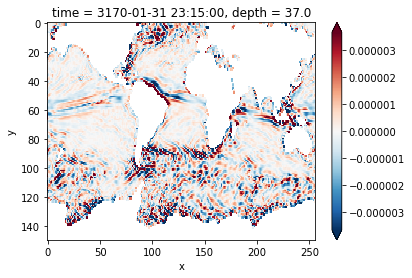

In [140]:
div_uv.isel(y=slice(70,None)).isel(time=0,depth=3).plot(**pa)

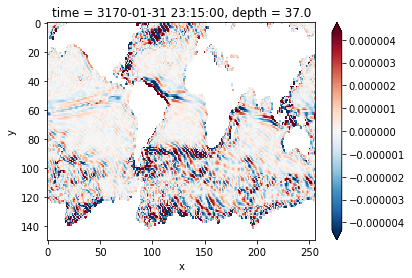

In [154]:
# this looks different than in example: divergence https://xgcm.readthedocs.io/en/latest/example_mitgcm.html#Vorticity
div_uv.isel(y=slice(70,None)).isel(time=0,depth=3).plot(**pa)

<module 'xgcm' from '/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xgcm/__init__.py'>

## Vorticity

The vertical component of the vorticity is a fundamental quantity of interest in ocean circulation theory. It is defined as

$$ \zeta = - \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x} \ . $$

On the c-grid, a finite-volume representation is given by

$$ \zeta =  (- \delta_j \Delta x_c u + \delta_i \Delta y_c v ) / A_\zeta \ . $$

In xgcm, we calculate this quanity as

In [171]:
zeta = (-grid.diff(dsr.uo, 'Y', boundary=boundary) + grid.diff(dsr.vo, 'X'))/fxr.apsixy

...which we can see is located at the `y_g, x_g` horizontal position (also commonly called the vorticity point).

We plot the vertical integral of this quantity, i.e. the barotropic vorticity:

In [144]:
zeta.dims

('time', 'depth', 'y_g', 'x_g')

In [145]:
fxr.ddpo.dims, fxr.dduo.dims, fxr.ddue.dims

(('depth', 'y', 'x_g'), ('depth', 'y_g', 'x'), ('depth', 'y', 'x'))

In [146]:
# there is no ddpsie
# this is grid independent and close to the desired
grid.diff(fxr.depth_2,'Z',boundary='extrapolate')

<xarray.DataArray (depth: 40)>
array([ 12.,  10.,  10.,  10.,  10.,  10.,  13.,  15.,  20.,  25.,  30.,
        35.,  40.,  45.,  50.,  55.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 170., 180., 190., 200., 220., 250., 270.,
       300., 350., 400., 450., 500., 500., 500.])
Coordinates:
  * depth    (depth) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03

In [147]:
#zeta_bt = (zeta * ds.drF).sum(dim='Z')
zeta_bt = (zeta * grid.diff(fxr.depth_2,'Z',boundary='extrapolate')).sum(dim='depth')

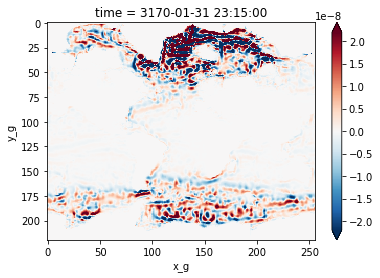

In [148]:
zeta_bt.isel(time=0).plot(**pa)

A different way to calculate the barotropic vorticity is to take the curl of the vertically integrated velocity.
This formulation also allows us to incorporate the $h$ factors representing partial cell thickness.

In [149]:
#u_bt = (ds.UVEL * ds.hFacW * ds.drF).sum(dim='Z')
u_bt = (dsr.uo * fxr.ddpo).sum(dim='depth')
#v_bt = (ds.VVEL * ds.hFacS * ds.drF).sum(dim='Z')
v_bt = (dsr.vo * fxr.dduo).sum(dim='depth')

In [172]:
#zeta_bt_alt = (-grid.diff(u_bt * ds.dxC, 'Y') + grid.diff(v_bt * ds.dyC, 'X'))/ds.rAz
zeta_bt_alt = (-grid.diff(u_bt * fxr.dlxp, 'Y', boundary=boundary) + grid.diff(v_bt * fxr.dlyu, 'X')) / fxr.apsixy

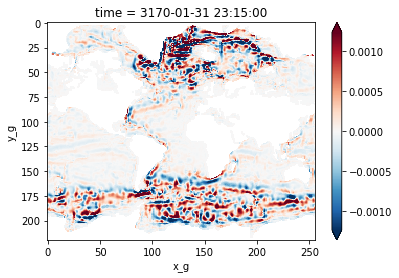

In [173]:
zeta_bt_alt.isel(time=0).plot(**pa)

### Strain

Another interesting quantity is the horizontal strain, defined as

$$ s = \frac{\partial u}{\partial x} - \frac{\partial v}{\partial y} \ . $$

On the c-grid, a finite-volume representation is given by

$$ s =  (\delta_i \Delta y_g u - \delta_j \Delta x_g v ) / A_c \ . $$

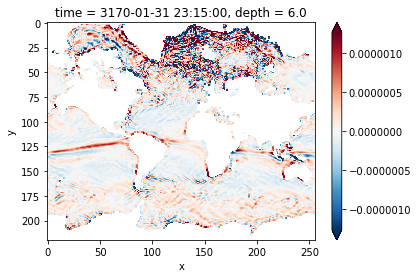

In [174]:
#strain = (grid.diff(ds.UVEL * ds.dyG, 'X') - grid.diff(ds.VVEL * ds.dxG, 'Y')) / ds.rA
strain = (grid.diff(dsr.uo * fxr.dlyp, 'X') - grid.diff(dsr.vo * fxr.dlxu, 'Y', boundary=boundary)) / fxr.avxy
strain.isel(time=0,depth=0).plot(**pa)

NOTE: This looks more like the expected divergence.

## Barotropic Transport Streamfunction

We can use the barotropic velocity to calcuate the barotropic transport streamfunction, defined via

$$ u_{bt} = - \frac{\partial \Psi}{\partial y} \ , \ \ v_{bt} = \frac{\partial \Psi}{\partial x} \ .$$

We calculate this by integrating $u_{bt}$ along the Y axis using the grid object's `cumsum` method:

In [154]:
#psi = grid.cumsum(-u_bt * ds.dyG, 'Y', boundary='fill')
psi = grid.cumsum(-u_bt * fxr.dlyp, 'Y', boundary='fill')
psi.dims

('time', 'y_g', 'x_g')

We see that xgcm automatically shifted the Y-axis position from center (YC) to left (YG) during the cumsum operation.

We convert to sverdrups and plot with a contour plot.

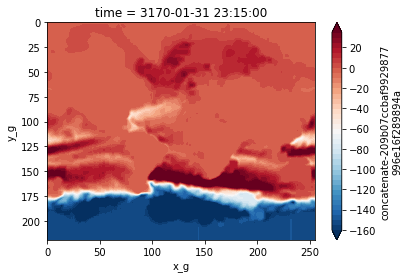

In [155]:
(psi.isel(time=0) / 1e6).plot.contourf(levels=np.arange(-160, 40, 5),**pa)

This doesn't look nice because it lacks a suitable land mask. The dataset has no mask provided for the vorticity point. But we can build one with xgcm!

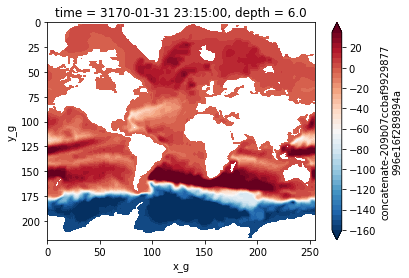

In [156]:
maskZ = grid.interp(fxr.dduo,'X').isel(depth=0)
(psi.isel(time=0) / 1e6).where(maskZ).plot.contourf(levels=np.arange(-160, 40, 5),**pa)

## Kinetic Energy

Finally, we plot the kinetic energy $1/2 (u^2 + v^2)$ by interpoloting both quantities the cell center point.

In [175]:
# ke = 0.5*(grid.interp((ds.UVEL*ds.hFacW)**2, 'X') + grid.interp((ds.VVEL*ds.hFacS)**2, 'Y'))
# MPIOM doesnt have fraction of Cell thinkness hFacW
ke = 0.5*(grid.interp((dsr.uo)**2, 'X') + grid.interp((dsr.vo)**2, 'Y', boundary=boundary))

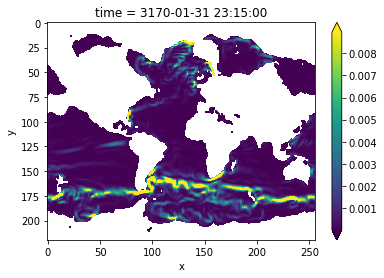

In [176]:
maskZ = grid.interp(fxr.ddpo,'X').isel(depth=0)
ke.isel(time=0,depth=20).where(maskZ).plot(**pa)

## grid-aware integration
https://xgcm.readthedocs.io/en/latest/grid_metrics.html#Grid-aware-integration

It is now possible to integrate over any grid axis. For example, we can integrate over the Z axis to compute the discretized version of:

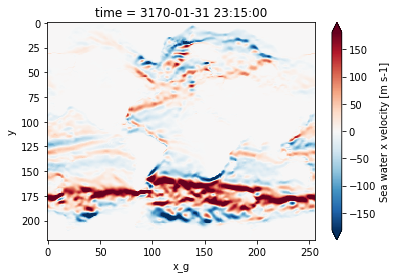

In [161]:
a = grid.integrate(dsr.uo, 'Z')
a.isel(time=0).plot(**pa)

In [162]:
# check equivalence
b = (dsr.uo * fxr.ddpo).sum('depth')
# reset coords
for c in a.coords:
    b[c]=a[c]
xr.testing.assert_equal(a, b)

We can do the exact same thing on a tracer field (which is located on a different grid point) by using the exact same syntax:

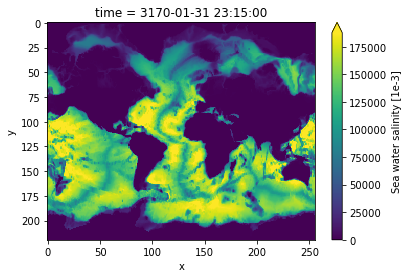

In [163]:
grid.integrate(dsr.so, 'Z').isel(time=0).plot(**pa)

It also works in two dimensions:

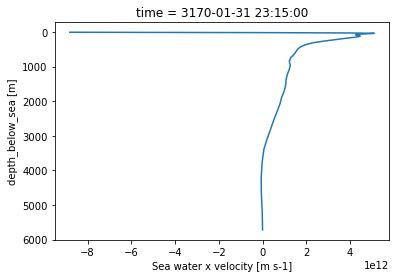

In [164]:
#a = grid.integrate(ds.UVEL, ['X', 'Y'])
a = grid.integrate(dsr.uo, ['X', 'Y'])

a.isel(time=0).plot(y='depth',yincrease=False)

In [165]:
# Equivalent to integrating over area
#b = (ds.UVEL * ds.rAw).sum(['XG', 'YC'])
b = (dsr.uo * fxr.apxy).sum(['x_g', 'y'])
xr.testing.assert_equal(a, b)

But wait, we did not provide a cell volume when setting up the `Grid`. What happened?

Whenever no matching metric is provided, xgcm will default to reconstruct it from the other available metrics, in this case the area and z distance of the tracer cell

In [166]:
#a = grid.integrate(ds.SALT, ['X', 'Y', 'Z'])
a = grid.integrate(dsr.so, ['X', 'Y', 'Z'])
#b = (ds.SALT * ds.rA * ds.drC).sum(['XC', 'YC', 'Z'])
b = (dsr.so * fxr.avxy * fxr.ddue).sum(['x', 'y', 'depth'])
xr.testing.assert_allclose(a, b)

## Grid-aware (weighted) average
xgcm can also calcualate the weighted average along each axis and combinations of axes. See for example the vertical average of salinity:

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


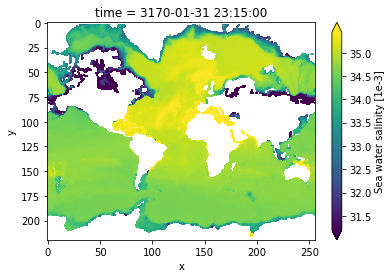

In [167]:
a = grid.average(ds.so, 'Z')
a.isel(time=0).plot(**pa)

In [168]:
#(ds.SALT * ds.drF).sum('Z') / ds.drF.sum('Z')
b = (dsr.so * fxr.ddue).sum('depth') / fxr.ddue.sum('depth')

# reset coords
for c in a.coords:
    b[c]=a[c]
xr.testing.assert_allclose(a, b)

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


## Ocean heat content

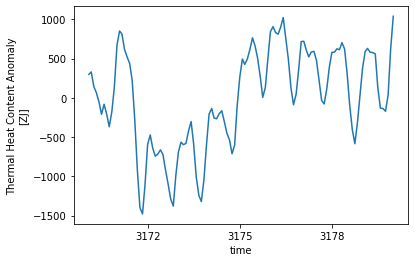

In [169]:
ithc = grid.integrate(dsr.heat_content,['Z','X','Y'])
ithc *= 1e-21
ithc -= ithc.mean('time')
ithc.attrs['units'] = 'ZJ'
ithc.attrs['long_name'] = 'Thermal Heat Content Anomaly'
ithc.plot()

# Full example

In [189]:
from dask.distributed import Client
import multiprocessing
ncpu = multiprocessing.cpu_count()
threads = 8
nworker = ncpu//threads
print(ncpu, threads, nworker)

client = Client(processes=False, threads_per_worker=threads,
                n_workers=nworker, memory_limit='64GB')
client

48 8 6


<Client: 'inproc://10.50.35.142/10569/1' processes=6 threads=48, memory=384.00 GB>

In [224]:
rename_fx={
    'y_2':'y', 'x_2': 'x_g',
    'y_3':'y_g', 'x_3':'x',
    #'y_4':'y_g', 'x_4':'x_g'
       }

In [276]:
%%time
timestr='*'
runid='vga0214_rerun'
#runid='asp_esmControl_PMassim_3014_SSTSSS_over_3170'
p = f'/work/bm1124/m300524/experiments/{runid}/outdata/mpiom/{runid}_mpiom_data_3d_mm_{timestr}.nc'
p = '/work/mh0727/m300524/experiments/vga0214/outdata/mpiom/vga0214_mpiom_data_3d_mm_3000-3300.nc'
ds = xr.open_mfdataset(p, chunks={'depth':1,'time':'auto'},
                       use_cftime=True, parallel=True, combine='nested', concat_dim='time', compat='override',coords='minimal', data_vars='minimal')

ds=ds.rename(rename_fx)

CPU times: user 21.4 s, sys: 9.64 s, total: 31.1 s
Wall time: 2min 30s


In [298]:
if 'umo' in ds.data_vars:
    ds = ds.rename({'umo':'uo','vmo':'vo'})
    ds['uo'] /= 1025
    ds['vo'] /= 1025

In [278]:
def calc_curl(ds):
    dv_dx = grid.derivative(ds.vo, 'X')
    du_dy = grid.derivative(ds.uo, 'Y',boundary='extend')
    curl = dv_dx - du_dy
    return curl

In [279]:
curl = calc_curl(ds.isel(depth=0))

In [280]:
curl.data

dask.array<sub, shape=(3612, 220, 256), dtype=float32, chunksize=(516, 219, 255), chunktype=numpy.ndarray>

In [281]:
%time curl = curl.compute()

CPU times: user 5.05 s, sys: 6.23 s, total: 11.3 s
Wall time: 3.57 s


/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


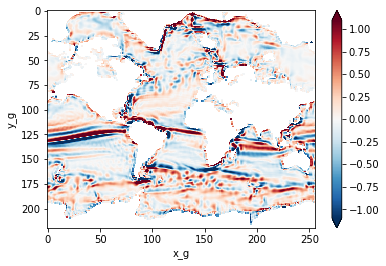

In [282]:
curl.mean('time').plot(**pa)

In [208]:
da=ds['thetao'].isel(depth=0).chunk({'time':12*10})
da

<xarray.DataArray 'thetao' (time: 480, y: 220, x: 256)>
dask.array<rechunk-merge, shape=(480, 220, 256), dtype=float32, chunksize=(120, 220, 256), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    depth    float64 6.0
  * time     (time) object 3110-01-31 23:15:00 ... 3149-12-31 23:15:00
Dimensions without coordinates: y, x
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea water potential temperature
    units:          C
    code:           2

In [215]:
def calc_grad(da):
    dt_dx = grid.derivative(da, 'X')
    dt_dy = grid.derivative(da, 'Y', boundary='extend')
    # these values are now situated on the cell faces, we need to 
    # interpolate them back to the center to combine them

    dt_dx = grid.interp(dt_dx, 'X')
    dt_dy = grid.interp(dt_dy, 'Y', boundary='extend')
    grad = (dt_dx**2 + dt_dy**2)**0.5
    return grad

In [216]:
grad = calc_grad(da)

In [217]:
grad = grad.compute()

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


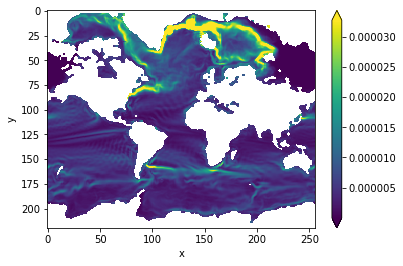

In [218]:
grad.mean('time').plot(**pa)

# help from
#### roxyboy

In [83]:
def roms_set_coords(ds):
    new_coords = [varname for varname in ds.data_vars
                  if ('time' not in ds[varname].dims)]
    ds_new = ds.set_coords(new_coords)
    return ds_new

dsr = roms_set_coords(ds)

#### jbuseke

In [8]:
coords={'xi':{'center':'xi_rho', 'inner':'xi_u'}, 
        'eta':{'center':'eta_rho', 'inner':'eta_v'}, 
        's':{'center':'s_rho', 'outer':'s_w'}}

# s->depth
coords={'X':{'center':'x', 'left':'x_2'},
        'Y':{'center':'y', 'left':'y_3'}, 
        'Z':{'center':'depth', 'left':'depth_2'}}

In [9]:
def rename_redundant_dim(ds, rename_dict):
    for k,v in rename_dict.items():
        ds_full = ds.copy()
        # remove redundant dims
        drop_vars = [a for a in ds.keys() if k in ds[a].dims]
        ds = ds.drop(drop_vars)
        for d in ds_full.data_vars:
            if k in ds_full[d].dims:
                ds[d] = ds_full[d].rename({k:v})
        for c in ds_full.coords:
            if k in ds_full[c].dims:
                ds.coords[c] = ds_full[c].rename({k:v})
    return ds

ds_renamed = rename_redundant_dim(ds, {'eta_u':'eta_rho', 'xi_v':'xi_rho'})
#ds_renamed['depth_2'].attrs['c_grid_axis_shift']= -0.5